In [ ]:
!pip install condacolab
import condacolab
condacolab.install()
!conda install -c conda-forge caiman

In [1]:
import caiman as cm 
from caiman.motion_correction import MotionCorrect
from caiman.source_extraction.cnmf.params import CNMFParams
import numpy as np
import matplotlib.pyplot as plt
from caiman.utils.visualization import view_quilt

# Motion Correction With CaImAn

In [2]:
filename = "Sue_2x_3000_40_-46.tif"
raw_data_2p = cm.load(filename)

In [3]:
raw_resize = raw_data_2p.copy()

In [4]:
resized = raw_resize.resize(fz=0.05)

In [5]:
resized.play(plot_text=True, fr=10) 

: 

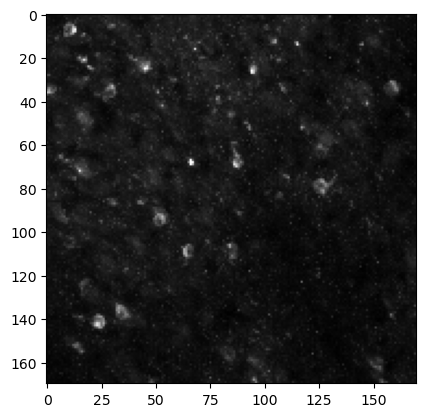

In [6]:
# maximum projection 1p
max_proj_2p = np.max(raw_data_2p, axis=0)
plt.imshow(max_proj_2p, cmap='gray')

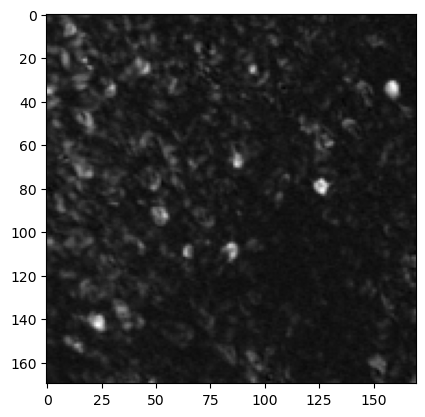

In [7]:
# correlation image
corr_2p = cm.local_correlations(raw_data_2p, swap_dim=False)
plt.imshow(corr_2p, cmap='gray')

## Rigid Motion Correction

In [9]:
filename = "../data/Sue_2x_3000_40_-46.tif"
fnames = [filename]

mc_rigid = MotionCorrect(
    fname = fnames,
    pw_rigid = False
)
mc_rigid.motion_correct(save_movie=True)

**Example** Find the name of the motion corrected memory mapped file

In [10]:
mc_rigid.fname_tot_rig

['../data\\Sue_2x_3000_40_-46_rig__d1_170_d2_170_d3_1_order_F_frames_3000.mmap']

Find the name of the motion corrected memory mapped file with `mmap_file` instead of `fname_tot_rig` 

In [11]:
mc_rigid.mmap_file

['../data\\Sue_2x_3000_40_-46_rig__d1_170_d2_170_d3_1_order_F_frames_3000.mmap']

Find if borders are filled with nan

Hint: use `border_nan`

In [12]:
mc_rigid.border_nan

True

How many pixels from border are empty

In [14]:
mc_rigid.border_to_0

3

Fill the blanks to load the motion corrected file and play the movie

How does this look?

In [15]:
filename = mc_rigid.fname_tot_rig
rigid_data_2p = cm.load(filename)
rigid_data_2p_resize = rigid_data_2p.copy()
rigid_data_2p_resize.resize(fz=0.05).play(plot_text=True, fr=10) 

100%|██████████| 1/1 [00:00<00:00,  4.62it/s]


**Example** Compare mean frames of raw data and motion corrected data

Text(0.5, 1.0, 'Rigid MC Mean')

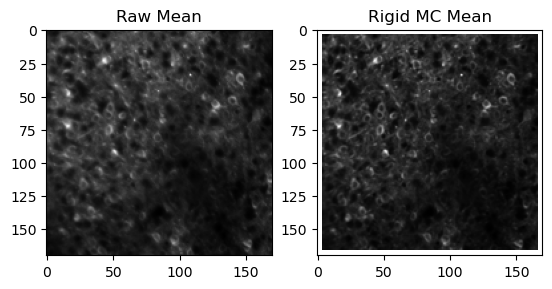

In [19]:
raw_mean = np.mean(raw_data_2p, axis=0)
mc_rigid_mean = np.mean(rigid_data_2p, axis=0)

plt.subplot(121)
plt.imshow(raw_mean, cmap='gray')
plt.title('Raw Mean')

plt.subplot(122)
plt.imshow(mc_rigid_mean, cmap='gray')
plt.title('Rigid MC Mean')

Compare median frames of raw data and motion corrected data 

Optional: Is there already a template which represents the median frame of motion corrected

Text(0.5, 1.0, 'Rigid MC Median')

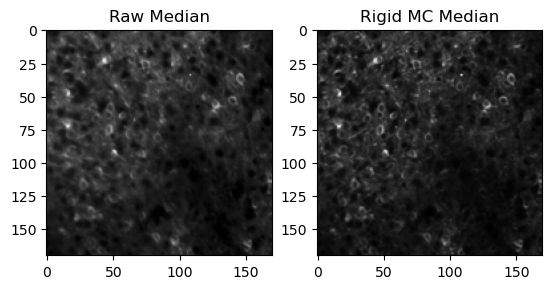

In [21]:
raw_mean = np.median(raw_data_2p, axis=0)
mc_rigid_median = mc_rigid.total_template_rig

plt.subplot(121)
plt.imshow(raw_mean, cmap='gray')
plt.title('Raw Median')

plt.subplot(122)
plt.imshow(mc_rigid_median, cmap='gray')
plt.title('Rigid MC Median')

Compare correlation images of raw data and motion corrected data 


Text(0.5, 1.0, 'Rigid MC Correlation')

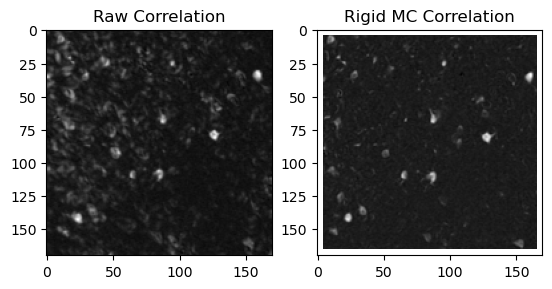

In [22]:
raw_corr = cm.local_correlations(raw_data_2p, swap_dim=False)
mc_rigid_corr = cm.local_correlations(rigid_data_2p, swap_dim=False)

plt.subplot(121)
plt.imshow(raw_corr, cmap='gray')
plt.title('Raw Correlation')

plt.subplot(122)
plt.imshow(mc_rigid_corr, cmap='gray')
plt.title('Rigid MC Correlation')

Remove nans from the border

In [23]:
filename = "../data/Sue_2x_3000_40_-46.tif"
fnames = [filename]

mc_rigid = MotionCorrect(
    fname = fnames,
    pw_rigid = False,
    border_nan='copy'
)
mc_rigid.motion_correct(save_movie=True)

In [24]:
filename = mc_rigid.fname_tot_rig
rigid_data_2p = cm.load(filename)

100%|██████████| 1/1 [00:00<00:00,  4.76it/s]


Text(0.5, 1.0, 'Rigid MC Mean')

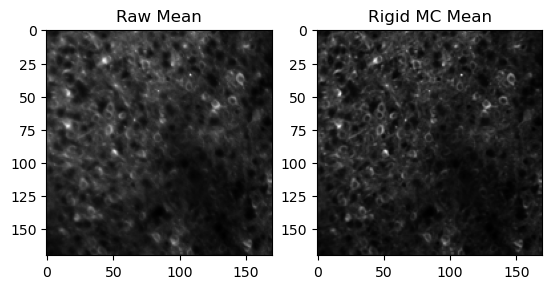

In [25]:
raw_mean = np.mean(raw_data_2p, axis=0)
mc_rigid_mean = np.mean(rigid_data_2p, axis=0)

plt.subplot(121)
plt.imshow(raw_mean, cmap='gray')
plt.title('Raw Mean')

plt.subplot(122)
plt.imshow(mc_rigid_mean, cmap='gray')
plt.title('Rigid MC Mean')

## Piece-wise Rigid Motion Correction

In [30]:
filename = "../data/Sue_2x_3000_40_-46.tif"
fnames = [filename]

mc_els = MotionCorrect(
    fname = fnames,
    pw_rigid = True,
    border_nan='copy'
)
mc_els.motion_correct(save_movie=True)

**Example** Does the above operation create a rigid motion corrected data?

Hint: use `fname_tot_rig`

In [31]:
mc_els.fname_tot_rig

[None]

What is the name of piece-wise rigid corrected data?

In [32]:
mc_els.fname_tot_els

['../data\\Sue_2x_3000_40_-46_els__d1_170_d2_170_d3_1_order_F_frames_3000.mmap']

What is the overlap in x and y pixels?

Hint: `overlaps`

In [34]:
mc_els.overlaps

(32, 32)

What is the stride in x and y pixels?

Hint: `strides`

In [37]:
mc_els.strides

(96, 96)

In [36]:
filename = mc_els.fname_tot_els
pw_rigid_data_2p = cm.load(filename)

100%|██████████| 1/1 [00:00<00:00,  4.53it/s]


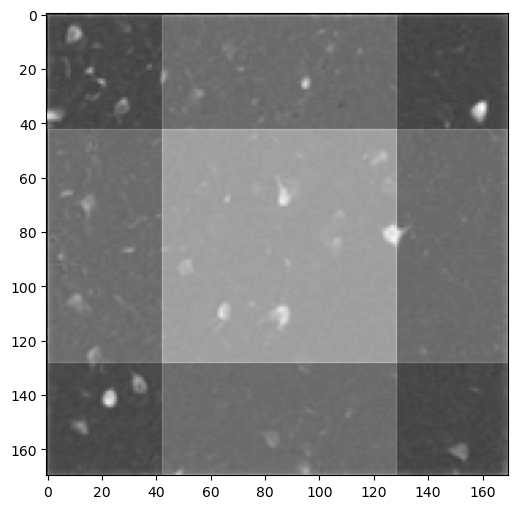

In [38]:
correlation_image = cm.local_correlations(pw_rigid_data_2p, swap_dim=False)
patch_ax = view_quilt(correlation_image, 
                      96, 
                      32, 
);

## `params` Object For Motion Correction

what do you see? Can you comment about the structure of `params`?

In [39]:
params = CNMFParams()
params 

CNMFParams:

data:

{'caiman_version': '1.9.16',
 'decay_time': 0.4,
 'dims': None,
 'dxy': (1, 1),
 'fnames': None,
 'fr': 30,
 'last_commit': 'GITW-3a4125fc2624815d0318536ea8bfd63be1f63036',
 'mmap_C': None,
 'mmap_F': None,
 'var_name_hdf5': 'mov'}

spatial_params:

{'block_size_spat': 5000,
 'dist': 3,
 'expandCore': array([[0, 0, 1, 0, 0],
       [0, 1, 1, 1, 0],
       [1, 1, 1, 1, 1],
       [0, 1, 1, 1, 0],
       [0, 0, 1, 0, 0]]),
 'extract_cc': True,
 'maxthr': 0.1,
 'medw': None,
 'method_exp': 'dilate',
 'method_ls': 'lasso_lars',
 'n_pixels_per_process': None,
 'nb': 1,
 'normalize_yyt_one': True,
 'nrgthr': 0.9999,
 'num_blocks_per_run_spat': 20,
 'se': None,
 'ss': None,
 'thr_method': 'nrg',
 'update_background_components': True}

temporal_params:

{'ITER': 2,
 'bas_nonneg': False,
 'block_size_temp': 5000,
 'fudge_factor': 0.96,
 'lags': 5,
 'memory_efficient': False,
 'method_deconvolution': 'oasis',
 'nb': 1,
 'noise_method': 'mean',
 'noise_range': [0.25, 0.5],
 'n

**Example** What are the data specific parameters

In [41]:
params.data

{'fnames': None,
 'dims': None,
 'fr': 30,
 'decay_time': 0.4,
 'dxy': (1, 1),
 'var_name_hdf5': 'mov',
 'caiman_version': '1.9.16',
 'last_commit': 'GITW-3a4125fc2624815d0318536ea8bfd63be1f63036',
 'mmap_F': None,
 'mmap_C': None}

What are temporal parameters?

In [42]:
params.temporal

{'ITER': 2,
 'bas_nonneg': False,
 'block_size_temp': 5000,
 'fudge_factor': 0.96,
 'lags': 5,
 'optimize_g': False,
 'memory_efficient': False,
 'method_deconvolution': 'oasis',
 'nb': 1,
 'noise_method': 'mean',
 'noise_range': [0.25, 0.5],
 'num_blocks_per_run_temp': 20,
 'p': 2,
 's_min': None,
 'solvers': ['ECOS', 'SCS'],
 'verbosity': False}

What are spatial parameters?

In [43]:
params.spatial

{'block_size_spat': 5000,
 'dist': 3,
 'expandCore': array([[0, 0, 1, 0, 0],
        [0, 1, 1, 1, 0],
        [1, 1, 1, 1, 1],
        [0, 1, 1, 1, 0],
        [0, 0, 1, 0, 0]]),
 'extract_cc': True,
 'maxthr': 0.1,
 'medw': None,
 'method_exp': 'dilate',
 'method_ls': 'lasso_lars',
 'n_pixels_per_process': None,
 'nb': 1,
 'normalize_yyt_one': True,
 'nrgthr': 0.9999,
 'num_blocks_per_run_spat': 20,
 'se': None,
 'ss': None,
 'thr_method': 'nrg',
 'update_background_components': True}

What are motion correction parameters? What do you think each of these parameters are for?

In [44]:
params.motion

{'border_nan': 'copy',
 'gSig_filt': None,
 'is3D': False,
 'max_deviation_rigid': 3,
 'max_shifts': (6, 6),
 'min_mov': None,
 'niter_rig': 1,
 'nonneg_movie': True,
 'num_frames_split': 80,
 'num_splits_to_process_els': None,
 'num_splits_to_process_rig': None,
 'overlaps': (32, 32),
 'pw_rigid': False,
 'shifts_opencv': True,
 'splits_els': 14,
 'splits_rig': 14,
 'strides': (96, 96),
 'upsample_factor_grid': 4,
 'use_cuda': False,
 'indices': (slice(None, None, None), slice(None, None, None))}

**Example** Update strides to (2, 2)

In [45]:
motion_params = {
    'strides': (2, 2)
}
params.motion.update(motion_params)
params.motion

{'border_nan': 'copy',
 'gSig_filt': None,
 'is3D': False,
 'max_deviation_rigid': 3,
 'max_shifts': (6, 6),
 'min_mov': None,
 'niter_rig': 1,
 'nonneg_movie': True,
 'num_frames_split': 80,
 'num_splits_to_process_els': None,
 'num_splits_to_process_rig': None,
 'overlaps': (32, 32),
 'pw_rigid': False,
 'shifts_opencv': True,
 'splits_els': 14,
 'splits_rig': 14,
 'strides': (2, 2),
 'upsample_factor_grid': 4,
 'use_cuda': False,
 'indices': (slice(None, None, None), slice(None, None, None))}

Update overlaps to (10, 10)

In [46]:
motion_params = {
    'overlaps': (10, 10)
}
params.motion.update(motion_params)
params.motion

{'border_nan': 'copy',
 'gSig_filt': None,
 'is3D': False,
 'max_deviation_rigid': 3,
 'max_shifts': (6, 6),
 'min_mov': None,
 'niter_rig': 1,
 'nonneg_movie': True,
 'num_frames_split': 80,
 'num_splits_to_process_els': None,
 'num_splits_to_process_rig': None,
 'overlaps': (10, 10),
 'pw_rigid': False,
 'shifts_opencv': True,
 'splits_els': 14,
 'splits_rig': 14,
 'strides': (2, 2),
 'upsample_factor_grid': 4,
 'use_cuda': False,
 'indices': (slice(None, None, None), slice(None, None, None))}

Update max_shifts to (4, 4)

In [47]:
motion_params = {
    'max_shifts': (4, 4)
}
params.motion.update(motion_params)
params.motion

{'border_nan': 'copy',
 'gSig_filt': None,
 'is3D': False,
 'max_deviation_rigid': 3,
 'max_shifts': (4, 4),
 'min_mov': None,
 'niter_rig': 1,
 'nonneg_movie': True,
 'num_frames_split': 80,
 'num_splits_to_process_els': None,
 'num_splits_to_process_rig': None,
 'overlaps': (10, 10),
 'pw_rigid': False,
 'shifts_opencv': True,
 'splits_els': 14,
 'splits_rig': 14,
 'strides': (2, 2),
 'upsample_factor_grid': 4,
 'use_cuda': False,
 'indices': (slice(None, None, None), slice(None, None, None))}

Update max_deviation_rigid to 4 and pw_rigid to True together

In [48]:
motion_params = {
    'max_deviation_rigid': 4,
    'pw_rigid': True
}
params.motion.update(motion_params)
params.motion

{'border_nan': 'copy',
 'gSig_filt': None,
 'is3D': False,
 'max_deviation_rigid': 4,
 'max_shifts': (4, 4),
 'min_mov': None,
 'niter_rig': 1,
 'nonneg_movie': True,
 'num_frames_split': 80,
 'num_splits_to_process_els': None,
 'num_splits_to_process_rig': None,
 'overlaps': (10, 10),
 'pw_rigid': True,
 'shifts_opencv': True,
 'splits_els': 14,
 'splits_rig': 14,
 'strides': (2, 2),
 'upsample_factor_grid': 4,
 'use_cuda': False,
 'indices': (slice(None, None, None), slice(None, None, None))}

**Example** What would a stride of 5 and overlap of 3 and view the patches

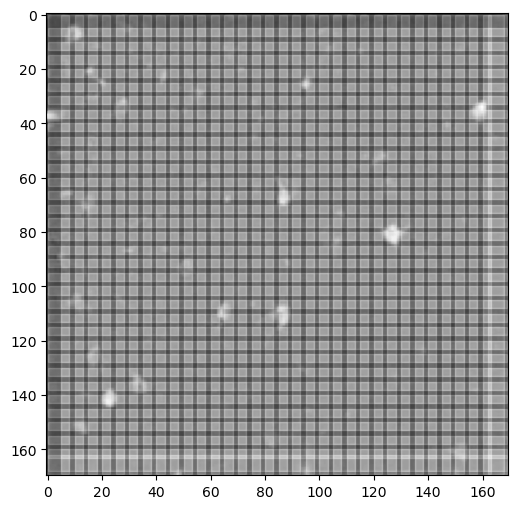

In [59]:
correlation_image = cm.local_correlations(pw_rigid_data_2p, swap_dim=False)
patch_ax = view_quilt(correlation_image, 
                      5, 
                      3, 
)
params.change_params(
    {
        'strides': (5, 5),
        'overlaps': (3, 3)
    }
);

What would a stride of 25 and overlap of 13 and view the patches

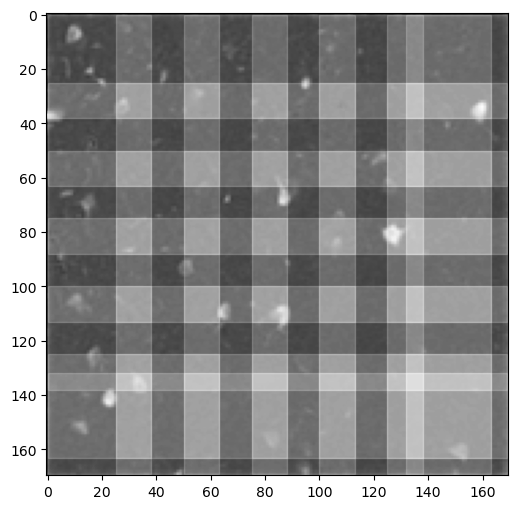

In [60]:
correlation_image = cm.local_correlations(pw_rigid_data_2p, swap_dim=False)
patch_ax = view_quilt(correlation_image, 
                      25, 
                      13, 
)
params.change_params(
    {
        'strides': (25, 25),
        'overlaps': (13, 13)
    }
);

What would a stride of 125 and overlap of 53 and view the patches

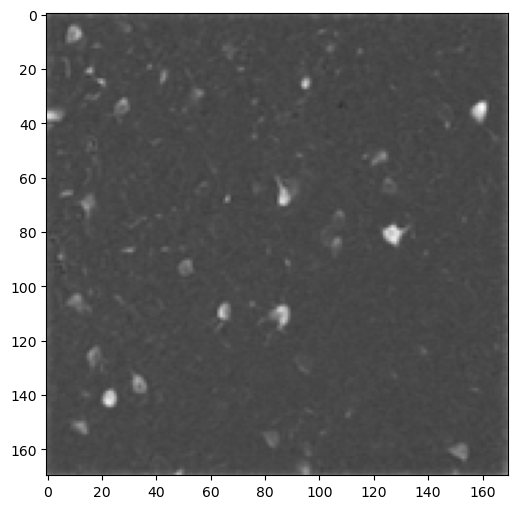

In [61]:
correlation_image = cm.local_correlations(pw_rigid_data_2p, swap_dim=False)
patch_ax = view_quilt(correlation_image, 
                      125, 
                      53, 
)
params.change_params(
    {
        'strides': (125, 125),
        'overlaps': (53, 53)
    }
);

What would a stride of 48 and overlap of 24 and view the patches

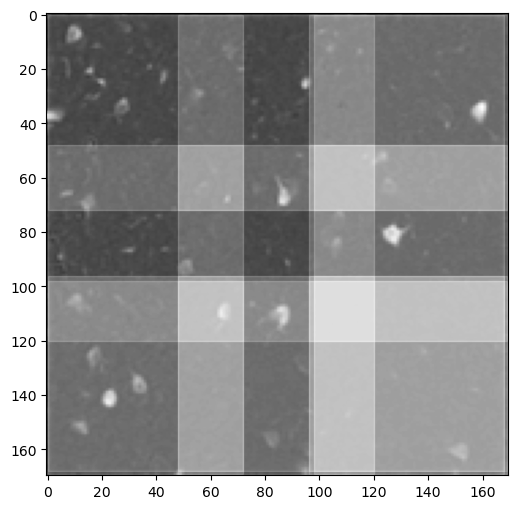

In [62]:
correlation_image = cm.local_correlations(pw_rigid_data_2p, swap_dim=False)
patch_ax = view_quilt(correlation_image, 
                      48, 
                      24, 
)
params.change_params(
    {
        'strides': (48, 48),
        'overlaps': (24, 24)
    }
);

In [63]:
filename = "../data/Sue_2x_3000_40_-46.tif"
fnames = [filename]
mc = MotionCorrect(fnames, **params.motion)
mc.motion_correct(save_movie=True)

## What else can we do with MotionCorrect object?

In [64]:
# visualizing shifts for rigid motion correction
params = CNMFParams() 
motion_params = {
    'pw_rigid': False
}
params.motion.update(
    motion_params
)

filename = "../data/Sue_2x_3000_40_-46.tif"
fnames = [filename]

mc_rigid = MotionCorrect(fnames, **params.motion)
mc_rigid.motion_correct(save_movie=True)

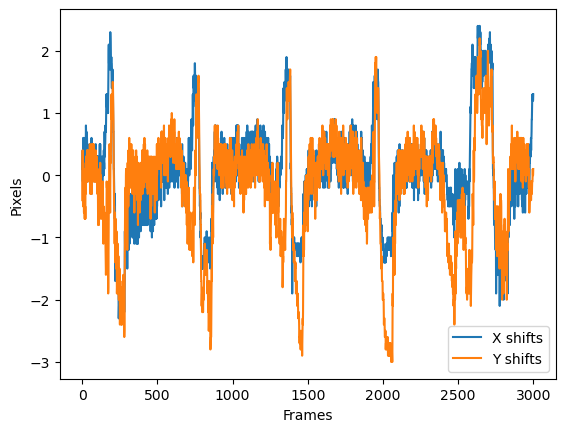

In [65]:
shifts = mc_rigid.shifts_rig
plt.plot(shifts)
plt.xlabel('Frames')
plt.ylabel('Pixels')
plt.legend(['X shifts','Y shifts'])

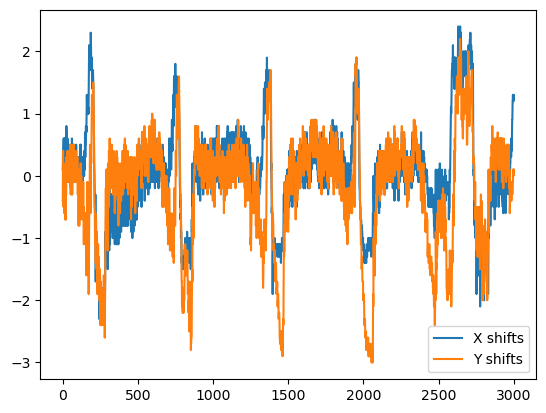

In [66]:
x_shift = [shift[0] for shift in shifts]
y_shift = [shift[1] for shift in shifts]

plt.plot(x_shift, label='X shifts')
plt.plot(y_shift, label='Y shifts')

plt.legend()

In [67]:
# visualizing shifts for piece-wise rigid motion correction
params = CNMFParams() 
motion_params = {
    'pw_rigid': True
}
params.motion.update(
    motion_params
)

filename = "../data/Sue_2x_3000_40_-46.tif"
fnames = [filename]

mc_pw_rigid = MotionCorrect(fnames, **params.motion)
mc_pw_rigid.motion_correct(save_movie=True)

In [68]:
x_shifts_pw = mc_pw_rigid.x_shifts_els
y_shifts_pw = mc_pw_rigid.y_shifts_els

len(x_shifts_pw[0]) # indicates 4 patches

4

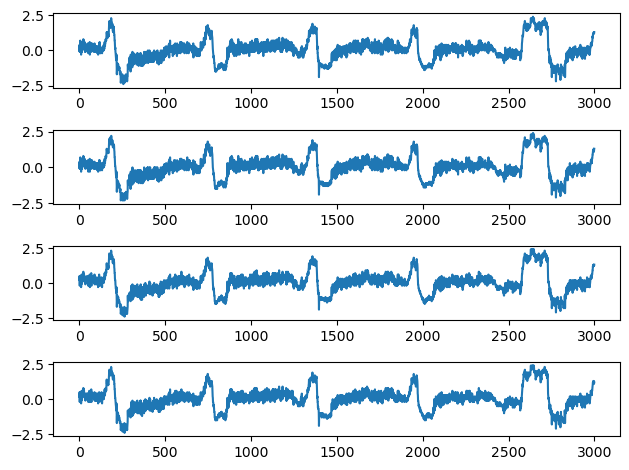

In [69]:
patch_1 = [x[0] for x in x_shifts_pw]
patch_2 = [x[1] for x in x_shifts_pw]
patch_3 = [x[2] for x in x_shifts_pw]
patch_4 = [x[3] for x in x_shifts_pw]

plt.subplot(411)
plt.plot(patch_1)

plt.subplot(412)
plt.plot(patch_2)

plt.subplot(413)
plt.plot(patch_3)

plt.subplot(414)
plt.plot(patch_4)

plt.tight_layout()

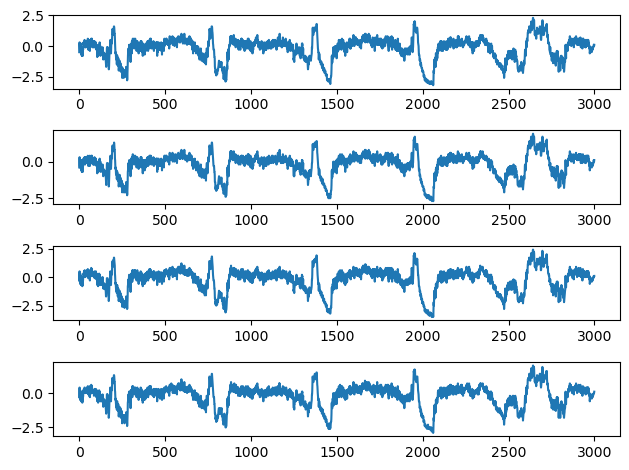

In [70]:
patch_1 = [y[0] for y in y_shifts_pw]
patch_2 = [y[1] for y in y_shifts_pw]
patch_3 = [y[2] for y in y_shifts_pw]
patch_4 = [y[3] for y in y_shifts_pw]

plt.subplot(411)
plt.plot(patch_1)

plt.subplot(412)
plt.plot(patch_2)

plt.subplot(413)
plt.plot(patch_3)

plt.subplot(414)
plt.plot(patch_4)

plt.tight_layout()